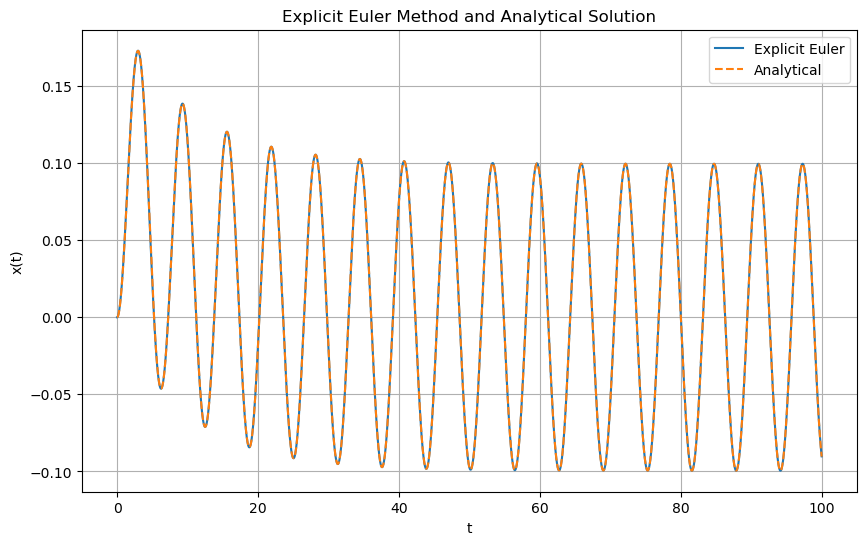

In [111]:
# a

# Consider the ODE dx/dt = a(sin t-x)
# For x(0) = 0, this has the analytical solution:
# x(t) = a/(1+a^2)(e^(-at)-cos t+a sin t)

# Solve the equation using the explicit Euler method and compare with the analytical solution for a = 0.1 on t \in [0,100] using dt = 0.01.

import numpy as np

def analytical_solution(a, t):
    first_factor = a/(1+a**2)
    second_factor = np.exp(-a*t)-np.cos(t) + a*np.sin(t)
    return first_factor * second_factor

def f_derived(t, x, a):
    return a * (np.sin(t) - x)

def euler_explicit(a, dt, t_max):
    t_values = np.arange(0, t_max, dt) # array of 0-99 evenly spaced by dt
    x_values = [0.0]  # x(0) = 0

    for i in range(1, len(t_values)): #start from 1 as x(0)=0 is already set
        x_i = x_values[-1] # value at previous time point
        t_i = t_values[i]
        x_next = x_i + dt * f_derived(t_i, x_i, a)
        x_values.append(x_next)

    return t_values, x_values

import matplotlib.pyplot as plt

a = 0.1
dt = 0.01
t_max = 100 

t_values_euler_explicit, x_values_euler_explicit = euler_explicit(a, dt, t_max)

t_values_analytical = np.linspace(0, t_max, 10000) # we could also just use t_values_euler_explicit for the x_values_analytical

x_values_analytical = analytical_solution(a, t_values_analytical)


plt.figure(figsize=(10, 6))
plt.plot(t_values_euler_explicit, x_values_euler_explicit, label='Explicit Euler')
plt.plot(t_values_euler_explicit, x_values_analytical, label='Analytical', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Explicit Euler Method and Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()


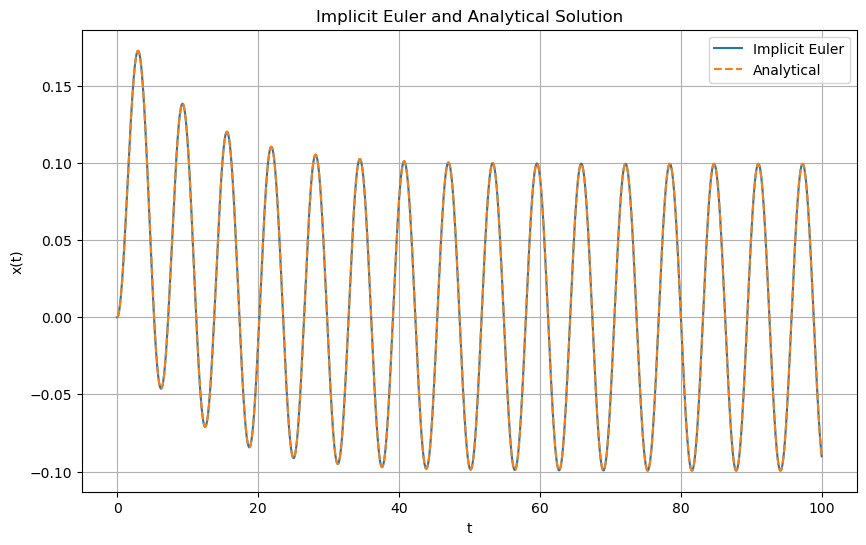

In [112]:
# b
from scipy.optimize import root
def implicit_equation(x_new, x_i, dt, a, t_i):
    return x_new - x_i - dt * a * (np.sin(t_i) - x_new)

def implicit_euler(a, dt, t_max):
    t_values = np.arange(0, t_max, dt)
    x_values = [0.0]  # x(0) = 0

    for i in range(1, len(t_values)):
        t_i = t_values[i]
        x_i = x_values[i - 1]
        result = root(implicit_equation, x_i, args=(x_i, dt, a, t_i)) # root to solve implicit equation
        x_new = result.x[0]
        x_values.append(x_new)

    return t_values, x_values

a = 0.1
dt = 0.01
t_max = 100

t_values_implicit, x_values_implicit = implicit_euler(a, dt, t_max)

plt.figure(figsize=(10, 6))
plt.plot(t_values_implicit, x_values_implicit, label='Implicit Euler')
plt.plot(t_values_euler_explicit, x_values_analytical, label='Analytical', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Implicit Euler and Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()


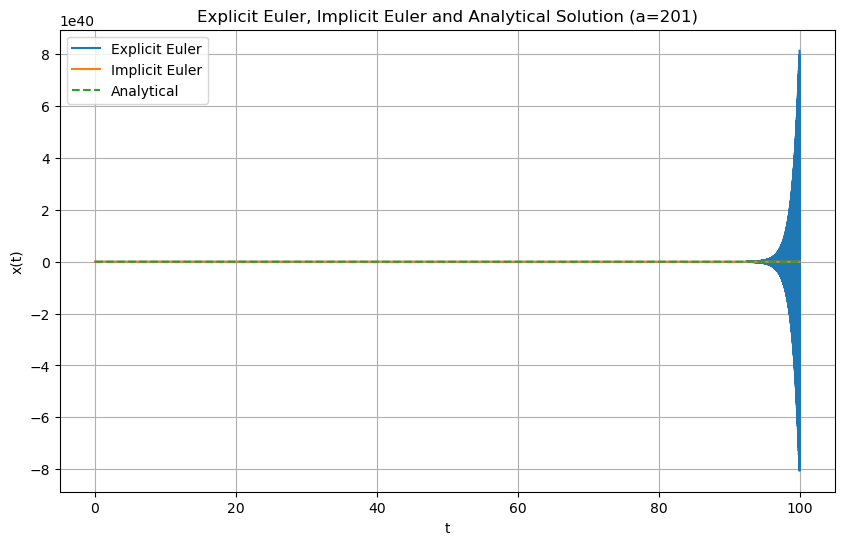

In [113]:
# c
a = 201

t_values_euler, x_values_euler = euler_explicit(a, dt, t_max)

t_values_implicit, x_values_implicit = implicit_euler(a, dt, t_max)

x_values_analytical = analytical_solution(a, t_values_euler)

plt.figure(figsize=(10, 6))
plt.plot(t_values_euler, x_values_euler, label='Explicit Euler')
plt.plot(t_values_implicit, x_values_implicit, label='Implicit Euler')
plt.plot(t_values_euler, x_values_analytical, label='Analytical', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(f'Explicit Euler, Implicit Euler and Analytical Solution (a={a})')
plt.legend()
plt.grid(True)
plt.show()
